# **Introduction to Machine Learning**

In this lecture, we plan to cover some of the machine learning principles and one or two algorithms.  


---
## Loading libraries 
---

In [45]:
# Loading the basic packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Loading the machine learning packages 
#from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

---
## Visualizing overfitting
---

In [47]:
# Loading the candy data from an url
candy_url = "candy-data.csv"
candy_data = pd.read_csv(candy_url)

In [48]:
# Printing the first few rows of the candy data 
candy_data.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465

In [49]:
# Extracting the features and label
X = candy_data.drop(['winpercent', 'competitorname'], axis = 1)
y = candy_data['winpercent']

In [50]:
# Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)#seed

# Instantiating the classifier 
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=4)#state..seedin essense, max featured to br choosed


# Fitting the instantiator 
rfr.fit(X_train, y_train)

# Printing the training and testing accuracies 
print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_test))))
rfr.get_params()

The training error is 3.99
The testing error is 8.57


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1111,
 'verbose': 0,
 'warm_start': False}

In [51]:
# plt.plot(y_test, 'o')
# plt.plot(rfr.predict(X_test))

Imp poroperty

In [52]:
rfr.fit(X_train, y_train)
rfr.feature_importances_

array([0.22837686, 0.05351922, 0.02335601, 0.06630648, 0.00817617,
       0.03747194, 0.03884472, 0.06412934, 0.03665512, 0.22363494,
       0.21952921])

---
## Visualizing the effect of parameter tuning

---

In [53]:
# Loading the tic_tac data from an url 
tic_tac_url = "tic-tac-toe_csv.csv"
tic_tac_data = pd.read_csv(tic_tac_url)

# Printing the dimensions of tic tac data 
tic_tac_data.shape

(958, 10)

In [54]:
# Printing the first few rows of the tic tac data
tic_tac_data.head()
# Observe the column named class 

TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True

In [55]:
# Renaming the class column as target 
tic_tac_data.rename(columns={'class': 'target'}, inplace=True)
# class is a reserved word

In [56]:
# Printing the head of the tic tac data 
tic_tac_data.head()
# Observe the class is renamed as target 

TL TM TR ML MM MR BL BM BR  target
0  x  x  x  x  o  o  x  o  o    True
1  x  x  x  x  o  o  o  x  o    True
2  x  x  x  x  o  o  o  o  x    True
3  x  x  x  x  o  o  o  b  b    True
4  x  x  x  x  o  o  b  o  b    True

In [57]:
# Creating a mapping for x and o in the tic tac data 
mapping_for_moves = {'x':1, "o":0}  # For b, we put mean of the data

# Counting the unique values in target column 
tic_tac_data.target.value_counts()

True     626
False    332
Name: target, dtype: int64

In [58]:
# Labelling the values of target column 
tic_tac_data.target = tic_tac_data.target.apply(lambda x: 0 if x==False else 1)########
# pd.set_option('display.max_rows', None)
# Counting the unique values in target column
tic_tac_data.target.value_counts()

1    626
0    332
Name: target, dtype: int64

In [59]:
# # Extracting the label and the features 
y = tic_tac_data['target']
tic_tac_data.drop("target", axis=1, inplace=True)

In [60]:
# Creating a mapping for  tic tac data 
###### 
for i in tic_tac_data.columns:
  tic_tac_data[i] = tic_tac_data[i].map(mapping_for_moves)

In [61]:
# Printing the head of the tic tac data 
tic_tac_data.head()
# Observe the 0,1 and NaN in the tic tac data 

TL   TM   TR   ML   MM   MR   BL   BM   BR
0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0
1  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0
2  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0
3  1.0  1.0  1.0  1.0  0.0  0.0  0.0  NaN  NaN
4  1.0  1.0  1.0  1.0  0.0  0.0  NaN  0.0  NaN

In [62]:
# Imputing the missing valus in the features 
X = SimpleImputer().fit_transform(tic_tac_data)


In [63]:
# Splitting the tic tac data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)#####

In [64]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train) ########predict??
    test_predictions = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
# plot the loss as well 

The training scores were: [0.94, 0.95, 0.98, 0.99, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.8, 0.8, 0.9, 0.91, 0.93, 0.96, 0.98, 1.0]


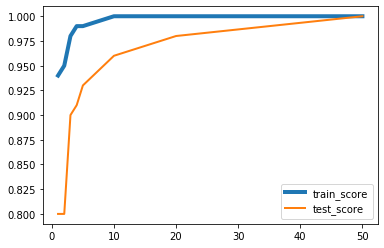

In [65]:
z = [1, 2, 3, 4, 5, 10, 20, 50]
plt.plot(z, train_scores, linewidth=4)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

---
## Visualizing the effect of feature normalization 
---

In [66]:
toy_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/toy_data.csv"
data_set = pd.read_csv(toy_url) 
data_set.head() 

Country  Age  Salary Purchased
0   France   44   72000        No
1    Spain   27   48000       Yes
2  Germany   30   54000        No
3    Spain   38   61000        No
4  Germany   40    1000       Yes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001697C3AD0C8>,
      dtype=object)

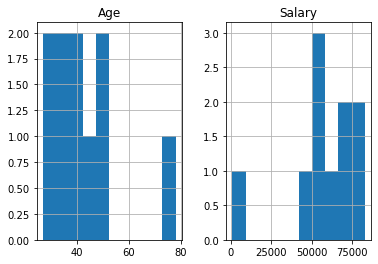

In [67]:
data_set.hist()

In [68]:
from sklearn import preprocessing 

# here Features - Age and Salary columns  
# are taken using slicing 
# to handle values with varying magnitude 
x = data_set.iloc[:, 1:3].values 
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 


After min max Scaling : 
 [[0.33333333 0.86585366]
 [0.         0.57317073]
 [0.05882353 0.64634146]
 [0.21568627 0.73170732]
 [0.25490196 0.        ]
 [0.15686275 0.69512195]
 [1.         0.62195122]
 [0.41176471 0.95121951]
 [0.45098039 1.        ]
 [0.19607843 0.80487805]]


In [69]:
Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(x) 
print ("\nAfter Standardisation : \n", x_after_Standardisation) 


After Standardisation : 
 [[ 0.09536935  0.66527061]
 [-1.15176827 -0.43586695]
 [-0.93168516 -0.16058256]
 [-0.34479687  0.16058256]
 [-0.1980748  -2.59226136]
 [-0.56487998  0.02294037]
 [ 2.58964459 -0.25234403]
 [ 0.38881349  0.98643574]
 [ 0.53553557  1.16995867]
 [-0.41815791  0.43586695]]


## Extreme Gradient Boosting with XGBoost

--- 
### Using XGBoost for classification
---

In [70]:
# Loading the dataset
diabetes_url = "diabetes.csv"
diabetes_data = pd.read_csv(diabetes_url)

In [71]:
# Printing the columns of the data 
diabetes_data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [72]:
# Printing the shape of the data 
diabetes_data.shape

(768, 9)

In [73]:
# Print the first few rows of the data 
diabetes_data.head(4)
# diabetes_data.iloc[[50,100,150]]

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   

   diabetes  
0         1  
1         0  
2         1  
3         0

In [74]:
# Printing the types of data in the dataset 
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [75]:
# Checking for missing values
print(diabetes_data.isna().sum())

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64


In [76]:
# Finding the number of distinct classes
diabetes_data.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

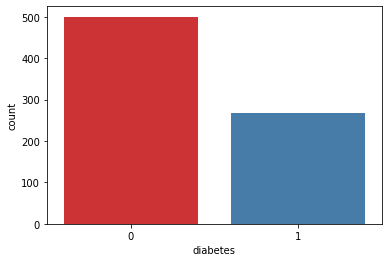

In [77]:
# Plotting the value counts in Customer_Segment
sns.countplot(diabetes_data['diabetes'], palette='Set1')
plt.show()
#plt.savefig('value-count.png')
# class imbalance case here

In [78]:
diabetes_data.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001697C57D908>,
      dtype=object)

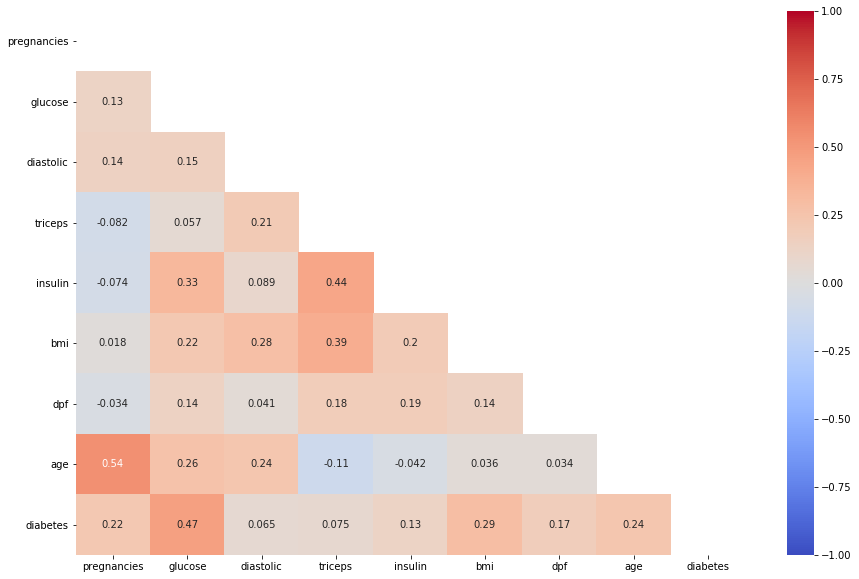

In [79]:
# Visualizing the correlation matrix 
plt.figure(figsize=(15,10))
mask = np.zeros_like(diabetes_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(diabetes_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [80]:
# separate the labels and the features - method 1 
label = diabetes_data['diabetes']
features_df = diabetes_data.drop(['diabetes'], axis=1)

In [81]:
# # Applying scaling on the features 
ss = StandardScaler()
features_df = ss.fit_transform(features_df)

In [82]:
# split data into X and y
X_train, X_test, y_train, y_test = train_test_split(features_df, label, train_size=0.8, random_state=123)

In [83]:
# Instantiating the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
# Applying classifier on train (seen) set
predictions = xgb_clf.predict(X_train)
# accuracy score

print(np.round(accuracy*100, 2), '%')

90.88 %


In [85]:
# Applying classifier on test (unseen) set
predictions = xgb_clf.predict(X_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

81.82 %


In [86]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))
# plot roc auc

[[82 14]
 [14 44]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        96
           1       0.76      0.76      0.76        58

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.82      0.82      0.82       154



--- 
### Demystifying classification report 
---



* Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

* Precision = $\frac{TP}{TP + FP}$

* Recall = $\frac{TP}{TP + FN}$

* f1-score = $\frac{2 * Recall * Precision}{Recall + Precision}$

---
### Plotting an ROC curve
----
A Receiver Operating Characteristic (ROC) curve is a graph with the x-axis values as the **False Positive Rate** (FPR) and the y-axis values as the **True Positive Rate** (TPR). The Area Under the Curve (AUC) for the ROC represents how capable a model is at correctly classifying a sample. 

* True Positive Rate = True Positives / (True Positives + False Negatives)
* False Positive Rate = False Positives / (False Positives + True Negatives)

References: 

* https://kite.com/python/answers/how-to-plot-an-roc-curve-in-python 
* https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ 

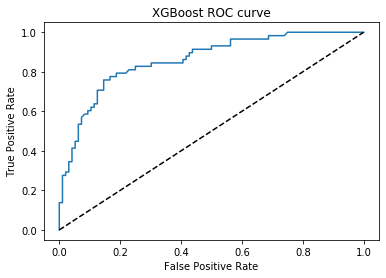

In [87]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

---
### Cross validation score
----

 Disadvantages of `train_test_split`: 

* train/test split does have its dangers — what if the split we make isn’t random? 
* What if one subset of our data has only people from a certain class of a particular feature? 
* This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

References: 

* https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 
* https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ 

In [88]:
diabetes_data.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

In [89]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123, shuffle= True)
results = cross_val_score(xgb_clf, X_train, y_train, cv=kfold)
print(results)


[0.74193548 0.70967742 0.74193548 0.74193548 0.73770492 0.75409836
 0.70491803 0.78688525 0.67213115 0.75409836]


Accuracy: 73.45% (3.01%)


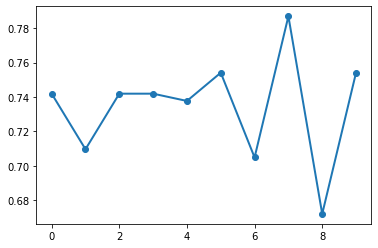

In [90]:
plt.plot(np.arange(10), results, 'o-', linewidth=2)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Words of advice:
* Generally, k-fold cross validation is the gold-standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.
* Use stratified cross validation to enforce class distributions when there are a large number of classes or an imbalance in instances for each class.

* Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.

Reference: https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/ 

---
### GridSearchCV
---

References: 

* https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ 
* https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/

In [91]:
from sklearn.model_selection import GridSearchCV

# Defining the classifier 
estimator = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = 42
)
# objective is binary:logistic: logistic regression for binary classification, output probability.
# nthread is the number of parallel threads used to run XGBoost.
# seed is Random number seed. 

In [92]:
# Defining the parameters to be tuned 
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [93]:
# Instantiating the grid search 
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
# n_jobs allows you to specify the number of parallel jobs to run.
# Verbose = True means the next code cell wil print what the machine is doing right now. 

In [94]:
 # Fitting the grid search 
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:   10.3s
[Parallel(n_jobs=10)]: Done 750 tasks      | elapsed:   23.1s
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:   30.8s finished


({'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 180},
 0.8331910569105692)

In [95]:
# Printing the arguments of the classifier 
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)